# Final Project
## ELEC 400M
#### Spencer Lee: 88207360
#### December 15, 2022

=======================================================================================================================

### Data Import

In [59]:
## MNIST data set loaded into 4 variables for testing and training (input=x, output=y)
from keras.datasets import mnist

# General use
import seaborn as sns  # data visualization
import collections
import matplotlib.pyplot as plt  # data visualization
from matplotlib.ticker import MaxNLocator

# Remainder of imports are done as they are needed to help with readability and referencing

=======================================================================================================================

# Neural Net

=======================================================================================================================

## Loading Data

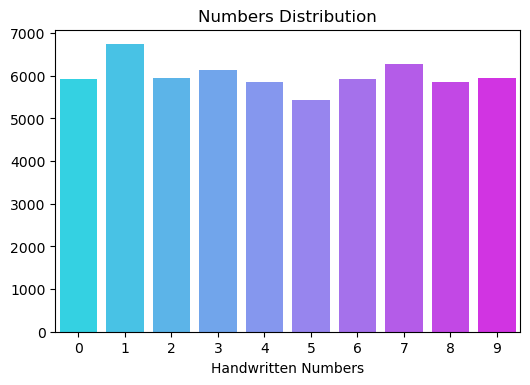

In [223]:
(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = mnist.load_data()

value_count_training = collections.Counter(training_dataset_y)

fig, ax0 = plt.subplots(1, 1, dpi=100)
ax = sns.barplot(x=list(value_count_training.keys()), y=list(value_count_training.values()), palette='cool')
ax.set_xlabel('Handwritten Numbers')
ax.set_title("Numbers Distribution")
plt.show();
training_dataset_x = training_dataset_x.reshape(-1, 28 * 28) 
test_dataset_x = test_dataset_x.reshape(-1, 28 * 28)

## Preprocessing

#### One-Hot-Encoding

In [224]:
# One-Hot-Encoding
from keras.utils import to_categorical

# Binary matrix representation of input
training_dataset_y = to_categorical(training_dataset_y)
test_dataset_y = to_categorical(test_dataset_y)

#### Normalization

In [225]:
training_dataset_x = training_dataset_x / 255
test_dataset_x = test_dataset_x / 255

In [78]:
test_dataset_x[:1000,:].shape

(1000, 784)

## Model

In [226]:
# Neural Net
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_dim=28 * 28, activation='relu', name='Hidden-1'))
model.add(Dense(256, activation='relu', name='Hidden-2'))
model.add(Dense(10, activation='softmax', name='Output'))

## Training

In [227]:
EPOCHS = 5
BATCH_SIZE = 64
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
%time hist = model.fit(training_dataset_x, training_dataset_y, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 6s 7ms/step - loss: 0.2191 - accuracy: 0.9349 - val_loss: 0.1220 - val_accuracy: 0.9628
Epoch 2/5
750/750 [==============================] - 5s 7ms/step - loss: 0.0847 - accuracy: 0.9745 - val_loss: 0.0839 - val_accuracy: 0.9744
Epoch 3/5
750/750 [==============================] - 5s 7ms/step - loss: 0.0554 - accuracy: 0.9824 - val_loss: 0.1002 - val_accuracy: 0.9702
Epoch 4/5
750/750 [==============================] - 5s 7ms/step - loss: 0.0389 - accuracy: 0.9875 - val_loss: 0.0819 - val_accuracy: 0.9767
Epoch 5/5
750/750 [==============================] - 5s 6ms/step - loss: 0.0283 - accuracy: 0.9912 - val_loss: 0.0865 - val_accuracy: 0.9766
Wall time: 25.8 s


## Evaluation

In [ ]:
training_dataset_x = training_dataset_x / 255
test_dataset_x = test_dataset_x / 255

#### Loss

In [228]:
loss, accuracy = model.evaluate(test_dataset_x, test_dataset_y)
print('loss = {}, accuracy = {}'.format(loss, accuracy))
print("Loss function = {}".format(model.loss))

313/313 [==============================] - 1s 2ms/step - loss: 0.0748 - accuracy: 0.9770
loss = 0.07478824257850647, accuracy = 0.9769999980926514
Loss function = categorical_crossentropy


#### Visual

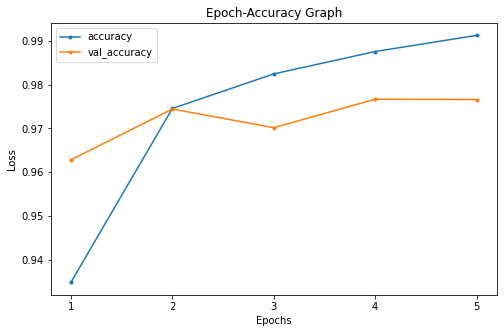

In [229]:
fig1 = plt.gcf()
fig1.set_size_inches(8,5)
ax = fig1.gca()
plt.title('Epoch-Accuracy Graph')
plt.plot(range(1, len(hist.epoch) + 1), hist.history['accuracy'],".-")
plt.plot(range(1, len(hist.epoch) + 1), hist.history['val_accuracy'], ".-")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['accuracy', 'val_accuracy'])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

## Hyper-parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Create the neural network model
model = MLPClassifier()

# Define the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(10, 10), (20, 20), (30, 30)],
    'alpha': [0.001, 0.01, 0.1]
}

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(training_dataset_x[:1000,:], training_dataset_y[:1000,:])

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the performance of the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


In [218]:
def create_NN(h1, h2):
#     print()
#     print("==========================================")
    model = Sequential()
    model.add(Dense(h1, input_dim=28 * 28, activation='relu', name='Hidden-1'))
    model.add(Dense(h2, activation='relu', name='Hidden-2'))
    model.add(Dense(10, activation='softmax', name='Output'))
    EPOCHS = 5
    BATCH_SIZE = 64
    model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
    time = %timeit -n1 -r1 -o model.fit(training_dataset_x, \
                           training_dataset_y, \
                           epochs=EPOCHS, \
                           batch_size=BATCH_SIZE, \
                           validation_split=0.2, \
                           verbose=0)
    
    loss, accuracy = model.evaluate(test_dataset_x, test_dataset_y, verbose=0)
    
    return [time.average, accuracy]
#     print("Hidden nodes = ({}, {})".format(h1,h2))
#     print('loss = {}, accuracy = {}'.format(loss, accuracy))
#     print("Loss function = {}".format(model.loss))
#     print("==========================================")
#     print()

In [219]:
hidden = [(256,256),
         (512,256),
         (256,512),
         (512,512)]

# acc=np.array([0]*5)
# time=np.array([0]*5)

for i in hidden:
    acc = [0]*5
    time = [0]*5
    for j in range(5):
        [time[j], acc[j]] = create_NN(i[0],i[1])
    time = np.array(time)
    acc = np.array(acc)
    print()
    print("==========================================")
    print("Hidden nodes = ({}, {})".format(i[0],i[1]))
    print("Average accuracy = {}".format(acc.mean()))
    print("Average time = {}".format(time.mean()))
    print("==========================================")
    print()

11 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
11.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
11.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
11.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
11.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

Hidden nodes = (256, 256)
Average accuracy = 0.9758000016212464
Average time = 11.21835998000024

21.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
22.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
22.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
21.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
21.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

Hidden nodes = (512, 256)
Average accuracy = 0.9767000079154968
Average time = 21.994827899999656

13.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
13.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
19.1 s ± 0 ns per loop (mean ± std.

In [199]:
result = %timeit -n1 -r2 -o sum(range(100));
result.average

1.3 µs ± 300 ns per loop (mean ± std. dev. of 2 runs, 1 loop each)


1.2999998943996616e-06

In [205]:
test = [0]*5
test2=np.array([10]*5)
test

[0, 0, 0, 0, 0]

In [222]:
acc.std()

0.0017760746687290065

=======================================================================================================================

# Convolutional Neural Network (CNN)

=======================================================================================================================

## Loading Data

In [230]:
(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = mnist.load_data()

training_dataset_x = training_dataset_x.reshape(-1, 28, 28, 1)
test_dataset_x = test_dataset_x.reshape(-1, 28, 28, 1)

training_dataset_x = training_dataset_x.astype('float32')
test_dataset_x = test_dataset_x.astype('float32')

## Preprocessing

#### One-Hot-Encoding

In [231]:
# Binary matrix representation of input
training_dataset_y = to_categorical(training_dataset_y)
test_dataset_y = to_categorical(test_dataset_y)

#### Normalization

In [232]:
training_dataset_x = training_dataset_x / 255
test_dataset_x = test_dataset_x / 255

## Model

In [233]:
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', name='Convolution-1'))
model.add(MaxPooling2D(name='MaxPooling2D-1'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', name='Convolution-2'))
model.add(MaxPooling2D(name='MaxPooling2D-2'))
model.add(Flatten())
model.add(Dense(128, activation='relu', name='Hidden-1'))
model.add(Dense(128, activation='relu', name='Hidden-2'))
model.add(Dense(10, activation='softmax', name='Output'))

model.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolution-1 (Conv2D)      (None, 26, 26, 32)        320       
                                                                 
 MaxPooling2D-1 (MaxPooling2  (None, 13, 13, 32)       0         
 D)                                                              
                                                                 
 Convolution-2 (Conv2D)      (None, 11, 11, 64)        18496     
                                                                 
 MaxPooling2D-2 (MaxPooling2  (None, 5, 5, 64)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 Hidden-1 (Dense)            (None, 128)             

## Training

In [234]:
EPOCHS = 5
BATCH_SIZE = 64
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
%time hist = model.fit(training_dataset_x, training_dataset_y, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 14s 17ms/step - loss: 0.2024 - accuracy: 0.9375 - val_loss: 0.0596 - val_accuracy: 0.9831
Epoch 2/5
750/750 [==============================] - 13s 17ms/step - loss: 0.0539 - accuracy: 0.9836 - val_loss: 0.0498 - val_accuracy: 0.9868
Epoch 3/5
750/750 [==============================] - 12s 16ms/step - loss: 0.0349 - accuracy: 0.9890 - val_loss: 0.0582 - val_accuracy: 0.9827
Epoch 4/5
750/750 [==============================] - 13s 17ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.0429 - val_accuracy: 0.9888
Epoch 5/5
750/750 [==============================] - 13s 17ms/step - loss: 0.0218 - accuracy: 0.9927 - val_loss: 0.0515 - val_accuracy: 0.9883
Wall time: 1min 3s


## Evaluation

#### Loss

In [235]:
loss, accuracy = model.evaluate(test_dataset_x, test_dataset_y)
print('loss = {}, accuracy = {}'.format(loss, accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.0369 - accuracy: 0.9885
loss = 0.03690759837627411, accuracy = 0.9884999990463257


#### Visual

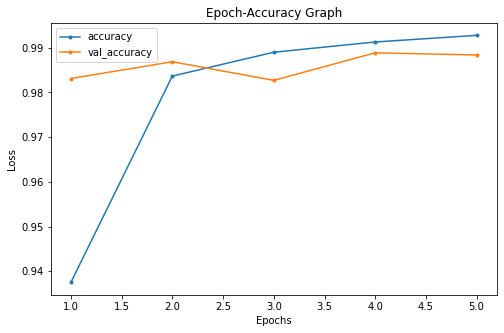

In [236]:
fig2 = plt.gcf()
fig2.set_size_inches(8,5)
ax = fig1.gca()
plt.title('Epoch-Accuracy Graph')
plt.plot(range(1, len(hist.epoch) + 1), hist.history['accuracy'],".-")
plt.plot(range(1, len(hist.epoch) + 1), hist.history['val_accuracy'], ".-")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['accuracy', 'val_accuracy'])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

=======================================================================================================================

# Basic Decision Tree

=======================================================================================================================

## Imports

In [237]:
# Standard Libraries
import os
import numpy as np 
import pandas as pd 
import random as rn

# Visualization libraries
import pydotplus
import matplotlib
sns.set_style({"axes.facecolor": ".95"})

# Modeling and Machine Learning
from IPython.display import Image 
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
# from sklearn.externals.six import StringIO  # Depreciated
from six import StringIO
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Seed for reproducability
seed = 1234
np.random.seed(seed)
rn.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

#### Accuracy Definition

In [238]:
def acc(y_true : np.ndarray, y_pred : np.ndarray) -> float: return round(accuracy_score(y_true, y_pred) * 100, 4)

## Loading Data

In [239]:
(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = mnist.load_data()

training_dataset_x = training_dataset_x.reshape(-1, 28, 28, 1)
test_dataset_x = test_dataset_x.reshape(-1, 28, 28, 1)

training_dataset_x = training_dataset_x.astype('float32')
test_dataset_x = test_dataset_x.astype('float32')

training_dataset_x = training_dataset_x.reshape(-1, 28*28)
test_dataset_x = test_dataset_x.reshape(-1, 28*28)

## Model & Training

In [5]:
# Train baseline decision tree model
clf = DecisionTreeClassifier(max_depth=30, random_state=seed)
%time clf.fit(training_dataset_x, training_dataset_y)

Wall time: 15 s


DecisionTreeClassifier(max_depth=30, random_state=1234)

## Evaluation

In [6]:
training_pred_result_clf = clf.predict(training_dataset_x)
test_pred_result_clf = clf.predict(test_dataset_x)

training_sccuracy = (training_dataset_y == training_pred_result_clf).sum() / len(training_dataset_y)
test_sccuracy = (test_dataset_y == test_pred_result_clf).sum() / len(test_dataset_y)

print("Training accuracy for our baseline (using all pixel features): {}".format(training_sccuracy))
print("Validation accuracy for our baseline (using all pixel features): {}".format(test_sccuracy))

Training accuracy for our baseline (using all pixel features): 0.9983
Validation accuracy for our baseline (using all pixel features): 0.8769


## Visualization

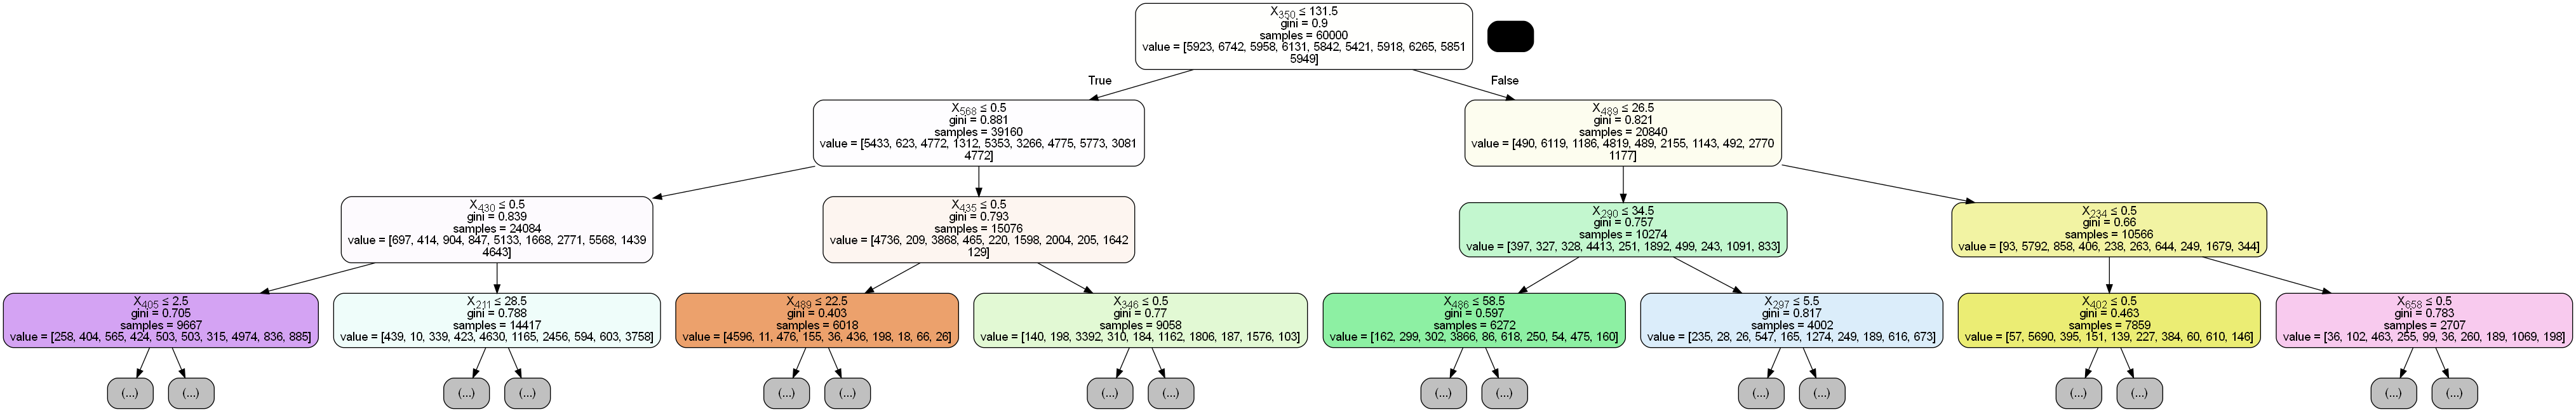

In [9]:
# Convert Decision Tree to visualization
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# Create PNG file
Image(graph.create_png())

## Optimization

In [246]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.592999,0.024340,0.008969,0.000012,5,{'max_depth': 5},0.674083,0.668917,0.666583,0.645250,0.691083,0.669183,0.014719,5
1,6.249880,0.052121,0.009580,0.000494,10,{'max_depth': 10},0.853167,0.844167,0.845500,0.843250,0.861583,0.849533,0.006971,4
2,8.191284,0.039215,0.010173,0.000399,15,{'max_depth': 15},0.873833,0.861583,0.864333,0.866500,0.881667,0.869583,0.007282,1
3,11.235164,0.160665,0.010973,0.000613,30,{'max_depth': 30},0.873583,0.860333,0.864667,0.863750,0.879583,0.868383,0.007107,2
4,12.087278,0.279111,0.010971,0.000016,60,{'max_depth': 60},0.870250,0.861917,0.861250,0.863167,0.877583,0.866833,0.006261,3


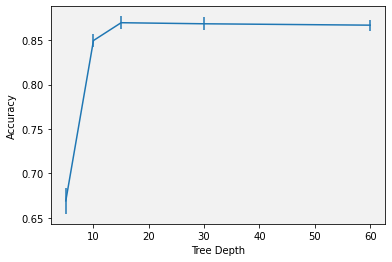

In [263]:
# Extract the mean and std of the test scores
mean_test_score = gs.cv_results_['mean_test_score']
std_test_score = gs.cv_results_['std_test_score']
params = pd.DataFrame(gs.cv_results_['params'])

# Plot the test scores
plt.errorbar(params.values, mean_test_score, yerr=std_test_score)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.show()


In [264]:
training_pred_result_clf = best_estimator.predict(training_dataset_x)
test_pred_result_clf = best_estimator.predict(test_dataset_x)

training_sccuracy = (training_dataset_y == training_pred_result_clf).sum() / len(training_dataset_y)
test_sccuracy = (test_dataset_y == test_pred_result_clf).sum() / len(test_dataset_y)

print("Training accuracy for our baseline (using all pixel features): {}".format(training_sccuracy))
print("Validation accuracy for our baseline (using all pixel features): {}".format(test_sccuracy))

Training accuracy for our baseline (using all pixel features): 0.9844166666666667
Validation accuracy for our baseline (using all pixel features): 0.8829


=======================================================================================================================

# Dimensionality Reduction (TSVD) Decision Tree

=======================================================================================================================

## Load Data

In [10]:
(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = mnist.load_data()
# Evaluate the baseline model
train_preds_baseline = clf.predict(training_dataset_x.reshape(-1, 28*28))
val_preds_baseline = clf.predict(test_dataset_x.reshape(-1, 28*28))
acc_baseline_train = acc(train_preds_baseline, training_dataset_y)
acc_baseline_val = acc(val_preds_baseline, test_dataset_y)
print(f'Training accuracy for our baseline (using all pixel features): {acc_baseline_train}%')
print(f'Validation accuracy for our baseline (using all pixel features): {acc_baseline_val}%')

Training accuracy for our baseline (using all pixel features): 99.83%
Validation accuracy for our baseline (using all pixel features): 87.69%


## Model

In [11]:
tsvd = TruncatedSVD(n_components=50).fit_transform(training_dataset_x.reshape(-1, 28*28))
clf = DecisionTreeClassifier(max_depth=30, random_state=seed)
%time clf.fit(tsvd[:50000], training_dataset_y[:50000])

Wall time: 4.78 s


DecisionTreeClassifier(max_depth=30, random_state=1234)

## Evaluation

In [12]:
# Evaluate model with the 50 TSVD features and compare to the baseline model
train_preds = clf.predict(tsvd[:50000])
val_preds = clf.predict(tsvd[50000:])
acc_tsvd_train = acc(train_preds, training_dataset_y[:50000])
acc_tsvd_val = acc(val_preds, training_dataset_y[50000:])
print(f'Training accuracy with TSVD features (50 components): {acc_tsvd_train}%')
print(f'Validation accuracy with TSVD features (50 components): {acc_tsvd_val}%')
# Check out how it performed compared to the baseline
acc_diff = round(acc_tsvd_val - acc_baseline_val, 2)
print(f'\nThis is a difference of {acc_diff}% in validation accuracy compared to the baseline.')

Training accuracy with TSVD features (50 components): 99.824%
Validation accuracy with TSVD features (50 components): 85.23%

This is a difference of -2.46% in validation accuracy compared to the baseline.


=======================================================================================================================

# TSVD + t-SNE Decision Tree <br>
TSVD: Truncated Singular Value Decomposition <br>
t-SNE: t-distributed Stochastic Neighbor Embedding

=======================================================================================================================

# Model

In [15]:
# Fit t-SNE on the Truncated SVD reduced data (50 features)
tsne = TSNE()
%time transformed = tsne.fit_transform(tsvd)
# Split up the t-SNE results in training and testing data
tsne_train = pd.DataFrame(transformed[:50000], columns=['component1', 'component2'])
tsne_test = pd.DataFrame(transformed[50000:], columns=['component1', 'component2'])

C:\Users\spenc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\spenc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Wall time: 5min 4s


#### Visualization

C:\Users\spenc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


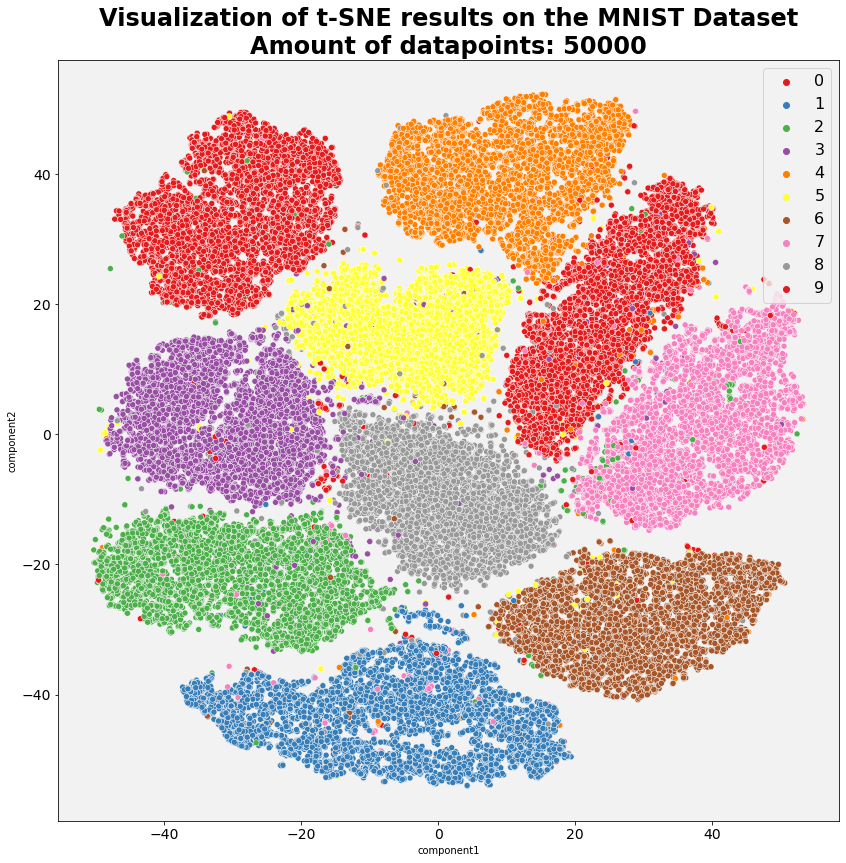

In [16]:
# Visualize the results for t-SNE on MNIST
plt.figure(figsize=(14, 14))
plt.title(f"Visualization of t-SNE results on the MNIST Dataset\n\
Amount of datapoints: {len(tsne_train)}", fontsize=24, weight='bold')
sns.scatterplot("component1", "component2", 
                data=tsne_train, hue=training_dataset_y[:50000], 
                palette="Set1", legend="full")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16);

#### Split Data

In [17]:
# Perform another split for t-sne feature validation
X_train, X_val, y_train, y_val = train_test_split(tsne_train, 
                                                  training_dataset_y[:50000], 
                                                  test_size=0.25, 
                                                  random_state=seed)

#### Model & Training

In [18]:
# Train model with t-sne features
clf = DecisionTreeClassifier(max_depth=10, random_state=seed)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=1234)

## Evaluation

#### Visual

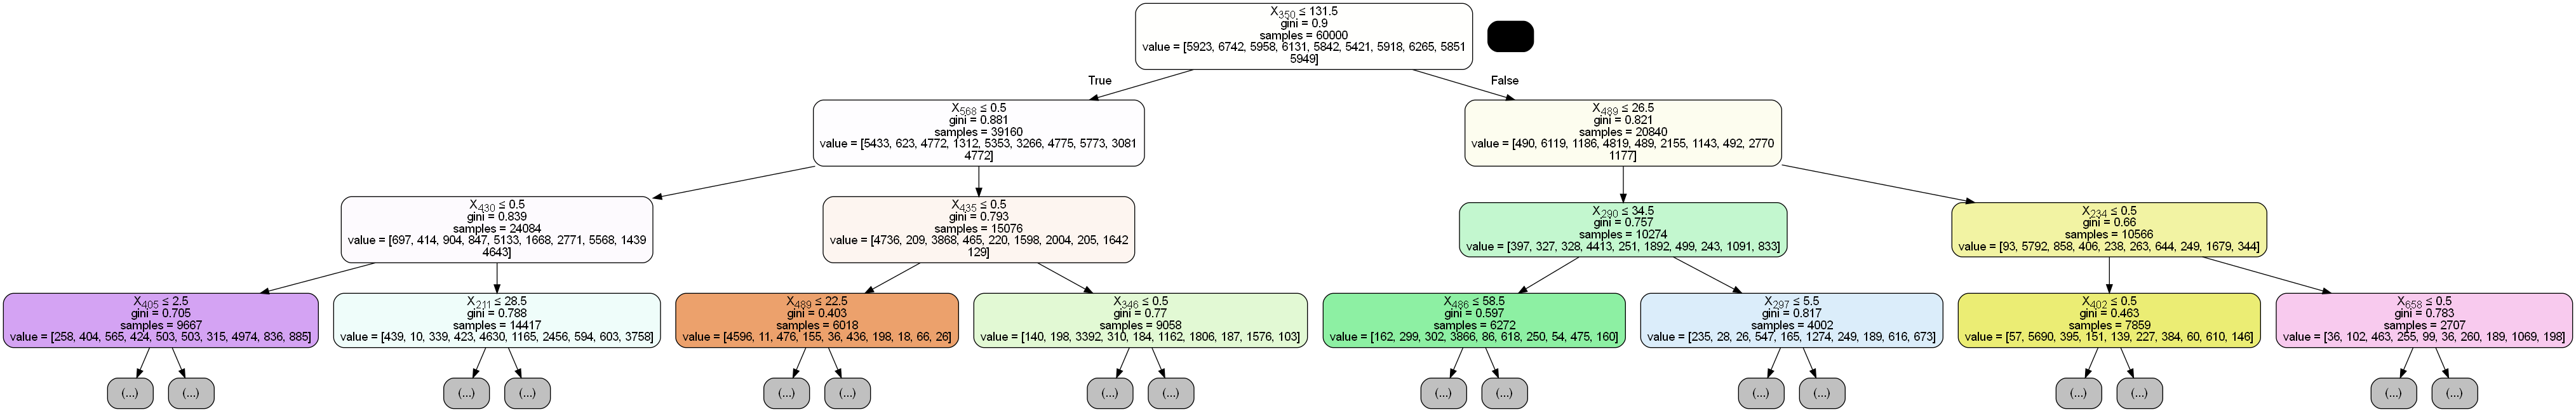

In [19]:
# Save the decision tree slice as PNG
graph.write_png("mnist_decision_tree_tsne.png");
Image(graph.create_png())

In [20]:
# Evaluate model with t-SNE features and compare to the baseline model
train_preds = clf.predict(X_train)
val_preds = clf.predict(X_val)
acc_tsne_train = acc(train_preds, y_train)
acc_tsne_val = acc(val_preds, y_val)
print(f'Training accuracy with t-SNE features: {acc_tsne_train}%')
print(f'Validation accuracy with t-SNE features: {acc_tsne_val}%')
# Compare t-SNE results with the baseline model
acc_diff = round(acc_tsne_val - acc_baseline_val, 2)
print(f'\nThis is an improvement of {acc_diff}% in validation accuracy over the baseline!')

Training accuracy with t-SNE features: 97.9147%
Validation accuracy with t-SNE features: 97.144%

This is an improvement of 9.45% in validation accuracy over the baseline!


=======================================================================================================================

# Logistic Regression

=======================================================================================================================

## Data

In [37]:
(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = mnist.load_data()
training_dataset_x = training_dataset_x.reshape(-1, 28 * 28)[:20000, :]
training_dataset_y = training_dataset_y[:20000]
test_dataset_x = test_dataset_x.reshape(-1, 28 * 28)

## Model, Training, & Evaluation

In [38]:
from sklearn.linear_model import LogisticRegression

# Define Model
lr = LogisticRegression(verbose=2, max_iter=1000)

# Fit the model to the data (train)
lr.fit(training_dataset_x, training_dataset_y)

# Evaluate the predicted result
lr_predict_result = lr.predict(test_dataset_x)

print("Logistic Regression: Accuracy result is {}".format((lr_predict_result == test_dataset_y).sum() / len(test_dataset_y)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Logistic Regression: Accuracy result is 0.8786


C:\Users\spenc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.2s finished


In [39]:
accuracy = accuracy_score(test_dataset_y, lr_predict_result)
print('Accuracy', accuracy)

Accuracy 0.8786


=======================================================================================================================

# Logistic Regression with Scaler

=======================================================================================================================

## Data

In [32]:
(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = mnist.load_data()
training_dataset_x = training_dataset_x.reshape(-1, 28 * 28)[:20000, :]
training_dataset_y = training_dataset_y[:20000]
test_dataset_x = test_dataset_x.reshape(-1, 28 * 28)

## Model, Training, & Evaluation

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

training_dataset_x = scaler.fit_transform(training_dataset_x)
test_dataset_x = scaler.transform(test_dataset_x)

model = LogisticRegression(verbose=2, max_iter=1000)
model.fit(training_dataset_x, training_dataset_y)

from sklearn.metrics import accuracy_score

y_pred = model.predict(test_dataset_x)
accuracy = accuracy_score(test_dataset_y, y_pred)
print('Accuracy', accuracy)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


LogisticRegression(max_iter=1000, verbose=2)

Accuracy 0.8968


=======================================================================================================================

# Random Forest

=======================================================================================================================

In [4]:
## MNIST data set loaded into 4 variables for testing and training (input=x, output=y)
from keras.datasets import mnist

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm

#Load other modules
import matplotlib.pyplot as plt  #Graphics
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score
#To show graphs within the notebook
%matplotlib inline 


In [5]:
(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = mnist.load_data()
training_dataset_x = training_dataset_x.reshape(-1, 28 * 28)
training_dataset_y = training_dataset_y
test_dataset_x = test_dataset_x.reshape(-1, 28 * 28)

In [6]:
# training_dataset_x[:,0].shape
train = np.column_stack((training_dataset_y,training_dataset_x))
test = np.column_stack((test_dataset_y,test_dataset_x))

In [7]:
#load the datasets
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [8]:
#Printing the size of the dataframe
print ("Training dataset has %i observations and %i variables" %(train.shape[0], train.shape[1]))
print ("Testing dataset has %i observations and %i variables" %(test.shape[0], test.shape[1]))

Training dataset has 60000 observations and 785 variables
Testing dataset has 10000 observations and 785 variables


In [9]:
#check few rows
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Seperate the target and independant variables
x_train=train.iloc[:,1:]
y_train=train.iloc[:,0]
x_test=test.iloc[:,1:]
y_test=test.iloc[:,0]

In [44]:
def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp, cmap='cividis')

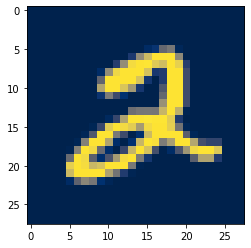

In [45]:
print_image(5, x_train)

In [13]:
#Check the frequency of each number
y_train.value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: 0, dtype: int64

C:\Users\spenc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='count'>

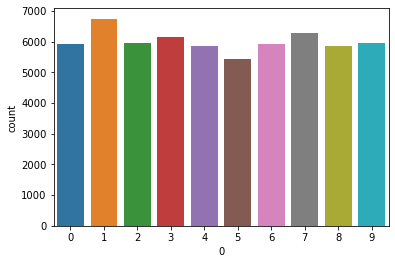

In [14]:
sns.countplot(y_train)

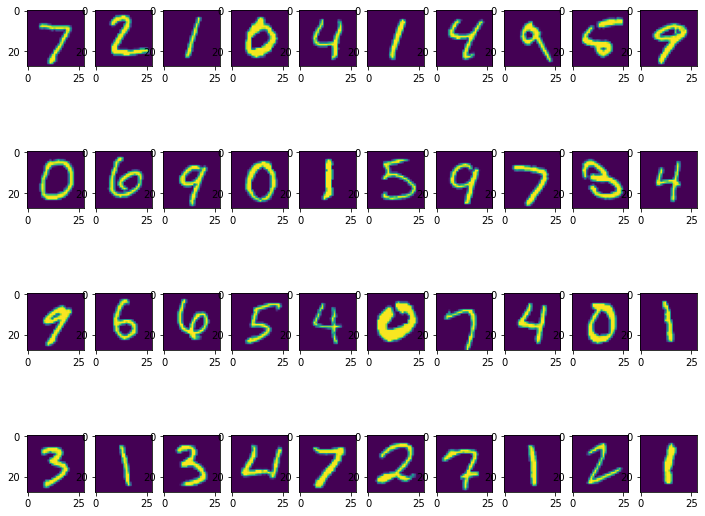

In [15]:
plt.figure(figsize=(12,10))
for i in range(40):
    plt.subplot(4, 10, i+1)
    print_image(i, x_test)

In [ ]:
# #Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)
# print(X_train.shape)
# print(X_test.shape)

In [16]:
#training random Forest
rf=RandomForestClassifier(n_estimators=500)
%time rf.fit(x_train,y_train)

Wall time: 2min 43s


RandomForestClassifier(n_estimators=500)

In [112]:
pred=rf.predict(x_test)
print("===================================================")
print ("Classification Report")
print("===================================================")
print(classification_report(y_test, pred, digits=4))
print("===================================================")
print ("Confusion Report")
print("===================================================")
print(confusion_matrix(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0     0.9701    0.9918    0.9808       980
           1     0.9903    0.9903    0.9903      1135
           2     0.9643    0.9690    0.9667      1032
           3     0.9643    0.9624    0.9633      1010
           4     0.9735    0.9735    0.9735       982
           5     0.9706    0.9630    0.9668       892
           6     0.9791    0.9781    0.9786       958
           7     0.9687    0.9630    0.9659      1028
           8     0.9617    0.9548    0.9583       974
           9     0.9552    0.9514    0.9533      1009

    accuracy                         0.9700     10000
   macro avg     0.9698    0.9697    0.9697     10000
weighted avg     0.9700    0.9700    0.9700     10000

Confusion Report
[[ 972    0    0    0    0    2    2    1    3    0]
 [   0 1124    3    2    0    2    1    1    1    1]
 [   6    0 1000    5    2    0    3    9    7    0]
 [   1    0    9  972    0    9    0    9  

In [265]:
#Cross validation
rf=RandomForestClassifier()
param = {'n_estimators': [10, 100, 500, 1000]}
grid_search = GridSearchCV(rf, param, cv=5)
gs = grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# score = cross_val_score(rf, x_train, y_train)
# print (np.mean(score))

KeyboardInterrupt: 

In [ ]:
# Extract the mean and std of the test scores
mean_test_score = gs.cv_results_['mean_test_score']
std_test_score = gs.cv_results_['std_test_score']
params = pd.DataFrame(gs.cv_results_['params'])

# Plot the test scores
plt.errorbar(params.values, mean_test_score, yerr=std_test_score)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.show()


In [355]:
nny = np.array([0.9741, 0.9870])
nnx = np.array([21.5, 59.5])

dtrx = np.array([15, 4.78, 5*60+4, 2*60+3])
dtry = np.array([0.8769, 0.8523, 0.9714, 0.9697])

lrx = np.array([28.2, 20.7])
lry = np.array([0.8786, 0.8968])

# nn = list(zip(nnx,nny))
# dtr = list(zip(dtrx,dtry))
# lr = list(zip(lrx,lry))


nn = np.column_stack((nnx,nny)).sort(0)
dtr = np.column_stack((dtrx,dtry)).sort(0)
lr = np.column_stack((lrx,lry)).sort(0)


In [337]:
nn

[(21.5, 0.9741), (59.5, 0.987)]

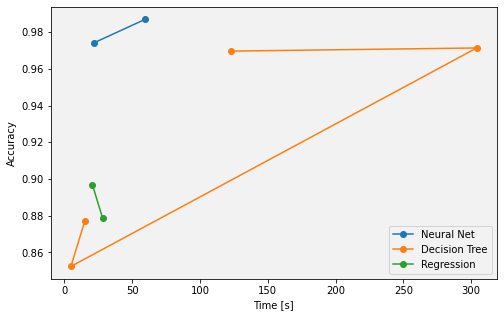

In [359]:


fig3 = plt.gcf()
fig3.set_size_inches(8,5)
ax = fig3.gca()

plt.plot(nnx, nny, '-o')
plt.plot(dtrx, dtry, '-o')
plt.plot(lrx, lry, '-o')

plt.xlabel("Time [s]")
plt.ylabel("Accuracy")
plt.legend(['Neural Net', 'Decision Tree', 'Regression'])
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()


In [354]:

nn = np.column_stack((nnx,nny))
dtr = np.column_stack((dtrx,dtry))
lr = np.column_stack((lrx,lry))

print(nn)

[[21.5     0.9741]
 [59.5     0.987 ]]
